In [1]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
TARGET = 'ad_id'

In [4]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_PATH_DICT[TARGET])
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_PATH_DICT[TARGET])

In [5]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [6]:
grid_df[TARGET] = grid_df[TARGET].map(lambda x: list(map(str, x)))

In [7]:
sentences = grid_df[TARGET].values.tolist()

In [8]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [9]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/baode/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET)
        self.epoch += 1

In [10]:
N_CORES = os.cpu_count()
print(N_CORES)

72


In [11]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 128,
          'window': 20,
          'min_count': 2,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': N_CORES,
          'callbacks': [callback()]}

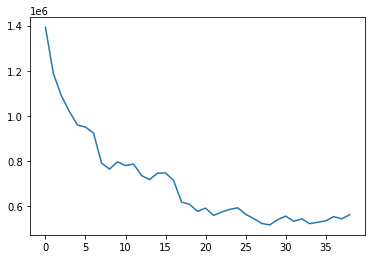

2020-06-17 14:06:38,295 : INFO : saving Word2Vec object under /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt, separately None
2020-06-17 14:06:38,296 : INFO : storing np array 'vectors' to /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.wv.vectors.npy


loss list:  [1970819.5, 3363671.0, 4550511.0, 5638087.5, 6657047.5, 7616222.5, 8566133.0, 9489953.0, 10280507.0, 11043968.0, 11839584.0, 12618652.0, 13404612.0, 14139422.0, 14856308.0, 15602046.0, 16348510.0, 17061806.0, 17678660.0, 18286066.0, 18861570.0, 19451784.0, 20009754.0, 20582524.0, 21167142.0, 21758884.0, 22321834.0, 22865972.0, 23388370.0, 23904218.0, 24443040.0, 24997762.0, 25529854.0, 26072636.0, 26594114.0, 27121816.0, 27655612.0, 28208182.0, 28750906.0, 29312160.0]
Loss after epoch 39: 29312160.0


2020-06-17 14:06:39,069 : INFO : not storing attribute vectors_norm
2020-06-17 14:06:39,071 : INFO : storing np array 'syn1neg' to /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.trainables.syn1neg.npy
2020-06-17 14:06:40,401 : INFO : not storing attribute cum_table
2020-06-17 14:06:44,761 : INFO : saved /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt
2020-06-17 14:06:45,796 : INFO : EPOCH 41 - PROGRESS: at 1.26% examples, 739578 words/s, in_qsize 143, out_qsize 1
2020-06-17 14:06:46,796 : INFO : EPOCH 41 - PROGRESS: at 2.84% examples, 835817 words/s, in_qsize 142, out_qsize 1
2020-06-17 14:06:47,806 : INFO : EPOCH 41 - PROGRESS: at 4.34% examples, 852752 words/s, in_qsize 144, out_qsize 0
2020-06-17 14:06:48,808 : INFO : EPOCH 41 - PROGRESS: at 5.85% examples, 860348 words/s, in_qsize 143, out_qsize 0
2020-06-17 14:06:49,809 : INFO : EPOCH 41 - PROGRESS: at 7.10% examples, 834258 words/s, in_qsize 143, out_qsize 0
2020-06-17 14:06:50,813 : INFO : EPOCH 41 -

2020-06-17 14:07:54,858 : INFO : EPOCH 41 - PROGRESS: at 89.04% examples, 747542 words/s, in_qsize 141, out_qsize 2
2020-06-17 14:07:55,880 : INFO : EPOCH 41 - PROGRESS: at 90.33% examples, 747305 words/s, in_qsize 142, out_qsize 2
2020-06-17 14:07:56,904 : INFO : EPOCH 41 - PROGRESS: at 91.58% examples, 747012 words/s, in_qsize 143, out_qsize 0
2020-06-17 14:07:57,923 : INFO : EPOCH 41 - PROGRESS: at 92.75% examples, 745930 words/s, in_qsize 143, out_qsize 0
2020-06-17 14:07:58,937 : INFO : EPOCH 41 - PROGRESS: at 94.03% examples, 745692 words/s, in_qsize 143, out_qsize 0


KeyboardInterrupt: 

In [12]:
model = Word2Vec(**params)

In [13]:
# ### Restore Model
# # #####################################
save_path = '/home/baode/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET
model = Word2Vec.load(save_path)

2020-06-17 14:08:18,700 : INFO : loading Word2Vec object from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt
2020-06-17 14:08:25,354 : INFO : loading wv recursively from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.wv.* with mmap=None
2020-06-17 14:08:25,356 : INFO : loading vectors from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.wv.vectors.npy with mmap=None
2020-06-17 14:08:25,807 : INFO : setting ignored attribute vectors_norm to None
2020-06-17 14:08:25,809 : INFO : loading vocabulary recursively from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.vocabulary.* with mmap=None
2020-06-17 14:08:25,810 : INFO : loading trainables recursively from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.trainables.* with mmap=None
2020-06-17 14:08:25,810 : INFO : loading syn1neg from /home/baode/huangzc/tencent/model_ckpt/gensim/model_ad_id.txt.trainables.syn1neg.npy with mmap=None
2020-06-17 14:08:26,204 : INFO : se

### 新方法

In [14]:
vocab = model.wv.index2word

In [15]:
vocab_dict = dict(zip(vocab, list(range(len(vocab)))))

In [16]:
f = open(TRAIN_DIR+'gensim_%s_dict.js'%TARGET,'w')
f.write(str(vocab_dict))
f.close()

In [17]:
wv_matrix = model.wv.vectors

In [18]:
np.save(TRAIN_DIR+'gensim_%s.npy'%TARGET, wv_matrix)

In [19]:
wv_matrix.shape

(1977176, 128)